# Testing Class Objects

In [20]:
class LetsSee:
    def __init__(self):
        """
        Constructor (initializer).
        This method is called when a new instance of the class is created.
        Overriding __init__ allows us to initialize instance attributes.
        """
        self.value = 10
        print("This is a class")

    def __repr__(self):
        """
        Official string representation of the object.
        Intended for developers and debugging.
        If possible, this should be a valid Python expression that can recreate the object.
        """
        return "This is a class in __repr__"
    
    def __str__(self):
        """
        Informal (or nicely printable) string representation of the object.
        Used by the print() function and str().
        """
        return "This is a class in __str__"
    
    def __del__(self):
        """
        Destructor.
        Called when the instance is about to be destroyed.
        Note: The timing of this call is determined by Python's garbage collection.
        """
        print("This is a class in __del__")

    def __call__(self):
        """
        Callable instance.
        This allows the object to be called as if it were a function.
        """
        print("This is a class in __call__")

    def __len__(self):
        """
        Defines the behavior of the built-in len() function.
        It should return an integer representing the length of the object.
        """
        return 5
    
    def __getitem__(self, key):
        """
        Called to retrieve an item using the indexing syntax (e.g., obj[key]).
        'key' can be an index or a slice.
        """
        return key
    
    def __setitem__(self, key, value):
        """
        Called to set the value of an item using the indexing syntax (e.g., obj[key] = value).
        """
        print(f"Setting key {key} to value {value}")

    def __delitem__(self, key):
        """
        Called when an item is deleted from the object using the 'del' statement (e.g., del obj[key]).
        """
        print(f"Deleting key {key}")

    def __iter__(self):
        """
        Returns an iterator for the object.
        This method should return an object that has a __next__() method.
        Here, the class itself is made to be its own iterator.
        """
        return self
    
    def __next__(self):
        """
        Returns the next item in iteration.
        This method is required for the object to be an iterator.
        (Note: In a real scenario, you'd want to manage a stopping condition to raise StopIteration.)
        """
        return 1
    
    def __contains__(self, item):
        """
        Defines behavior for membership testing using the 'in' operator.
        Returns True if the item is found in the object, otherwise False.
        """
        return True
    
    def __add__(self, other):
        """
        Overloads the addition operator (+).
        This method defines how to add two instances or an instance and another value.
        """
        return self.value + other.value if isinstance(other, LetsSee) else self.value + other
    
    def __sub__(self, other):
        """
        Overloads the subtraction operator (-).
        """
        return 10
    
    def __mul__(self, other):
        """
        Overloads the multiplication operator (*).
        """
        return 10
    
    def __truediv__(self, other):
        """
        Overloads the true division operator (/).
        """
        return 10
    
    def __floordiv__(self, other):
        """
        Overloads the floor division operator (//).
        """
        return 10


In [21]:

# Example usage:
obj = LetsSee()       # Calls __init__


This is a class


In [4]:

obj      # Calls __repr__


This is a class in __repr__

In [8]:

print(obj)


This is a class in __str__


In [9]:

len(obj)      # Calls __len__()


5

In [10]:

obj()                 # Calls __call__()


This is a class in __call__


In [14]:

obj[5]        # Calls __getitem__()


5

In [15]:

obj[5] = "example"    # Calls __setitem__()


Setting key 5 to value example


In [16]:

del obj[5]            # Calls __delitem__()


Deleting key 5


In [17]:

print(3 in obj)       # Calls __contains__()


True


In [23]:

print(obj + 1)        # Calls __add__()


11


# Testing Children logic in Class

In [2]:
class testing_children:

	def __init__(self, data, _children = ()):
		
		self.data = data

		self._prev = set(_children)

	def __repr__(self):
		return f"testing_children({self.data})"

	def __add__(self, other):

		return testing_children(self.data + other.data, _children = (self, other))
	
	def __mul__(self, other):

		return testing_children(self.data * other.data, _children = (self, other))

In [3]:
a = testing_children(1)
b = testing_children(2)
c = testing_children(3)

e = testing_children(4)

d = a + b + c

e = d * a

In [4]:
d

testing_children(6)

In [5]:
d._prev

{testing_children(3), testing_children(3)}

In [6]:
e

testing_children(6)

In [7]:
e._prev

{testing_children(1), testing_children(6)}

The code you provided `e._prev` is accessing the `_prev` attribute of an object `e`. Based on the provided code snippets, it seems that `e` is an instance of a class that has a `_prev` attribute.

In the `__init__` method of the class, the `_prev` attribute is set to a set of `_children`. The order of elements in a set is not guaranteed, so when you access `e._prev`, the order of elements may not necessarily be the same as the order in which they were added.

If you want to maintain the order of elements, you can use a different data structure such as a list or tuple instead of a set. For example:





By using a list, the order of elements will be preserved when you access `e._prev`.

# Trying my own version of traversing the tree

In [38]:
class myentity:
	def __init__(self, value, label = "", _prev = "", _op = ""):
		self.data = value
		self.children = _prev
		self.label = label
		self._op = _op

	def __str__(self):
		#return f"This is my entity class, meant for print statements, has value {self.data}"
		return f"Node, value {self.data}"

	def __repr__(self):
		return f"Entity has value: {self.data}, label: {self.label}, op: {self._op}"

	def __add__(self, other):
		return myentity(self.data + other.data, _prev=(self, other), _op="+") if isinstance(other, myentity) else myentity(self.data + other)
	
	def __sub__(self, other):
		return myentity(self.data - other.data, _prev=(self, other), _op="-") if isinstance(other, myentity) else myentity(self.data - other)
	
	def __truediv__(self, other):
		return myentity(self.data / other.data, _prev=(self, other), _op="/") if isinstance(other, myentity) else myentity(self.data / other)

	def __mul__(self, other):
		return myentity(self.data * other.data, _prev=(self, other), _op="*") if isinstance(other, myentity) else myentity(self.data * other)


In [39]:
#a = myentity(5)
#b = myentity(10)
#c = myentity(15)
#d = myentity(20)

#e = a + b
#f = c * d
#g = e + f

#print(a)
#a

a = myentity(5); a.label = 'a'
b = myentity(10); b.label = 'b'
c = myentity(15); c.label = 'c'
d = myentity(20); d.label = 'd'

e = a + b; e.label = 'e'
f = c * b; f.label = 'f'
g = e + f; g.label = 'g'

print(a)
a

Node, value 5


Entity has value: 5, label: a, op: 

Printing nodes:
Node, value 15
Node, value 150
Node, value 15
Node, value 165
Node, value 5
Node, value 10
Printing edges:
(Entity has value: 5, label: a, op: , Entity has value: 15, label: e, op: +)
(Entity has value: 15, label: e, op: +, Entity has value: 165, label: g, op: +)
(Entity has value: 15, label: c, op: , Entity has value: 150, label: f, op: *)
(Entity has value: 150, label: f, op: *, Entity has value: 165, label: g, op: +)
(Entity has value: 10, label: b, op: , Entity has value: 15, label: e, op: +)
(Entity has value: 10, label: b, op: , Entity has value: 150, label: f, op: *)


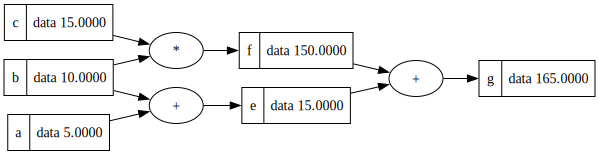

In [46]:
def trace(root):
    nodes, edges = set(), set()

    def build(v):
        
        nodes.add(v)
        for child in v.children:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

    #def build(v):
    #    if v not in nodes:
    #        nodes.add(v)
    #        for child in v.children:
    #            edges.add((child, v))
    #            build(child)
    #build(root)
    #return nodes, edges


from graphviz import Digraph

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        #dot.node(name=str(id(n)), label = "{  %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        #remove grad
        dot.node(name=str(id(n)), label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    print("Printing nodes:")
    for node in nodes:
        print(node)

    print("Printing edges:")
    for edge in edges:
        print(edge)

    return dot


draw_dot(g)

In [49]:
# topological order all of the children in the graph
topo = []
visited = set()
def build_topo(v):
	if v not in visited:
		visited.add(v)
		for child in v.children:
			build_topo(child)
		topo.append(v)
build_topo(g)

topo

[Entity has value: 5, label: a, op: ,
 Entity has value: 10, label: b, op: ,
 Entity has value: 15, label: e, op: +,
 Entity has value: 15, label: c, op: ,
 Entity has value: 150, label: f, op: *,
 Entity has value: 165, label: g, op: +]

## V1

In [41]:
def traverse(root):
	nodes, edges = set(), set()

	def iterate_nodes(node):
		if node not in nodes:
			nodes.add(node)
			for child in node.children:
				edges.add((child, node))
				iterate_nodes(child)

	iterate_nodes(root)

	return nodes, edges


traverse(g)



({Entity has value: 10, label: b, op: ,
  Entity has value: 15, label: e, op: +,
  Entity has value: 15, label: c, op: ,
  Entity has value: 150, label: f, op: *,
  Entity has value: 165, label: g, op: +,
  Entity has value: 5, label: a, op: },
 {(Entity has value: 10, label: b, op: ,
   Entity has value: 15, label: e, op: +),
  (Entity has value: 10, label: b, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: c, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: e, op: +,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 150, label: f, op: *,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 5, label: a, op: ,
   Entity has value: 15, label: e, op: +)})

## V2

In [42]:
def build(root):
	nodes, edges = set(), set()
	def traverse(node):
		if node not in nodes:
			nodes.add(node)
			for child in node.children:
				edges.add((child, node))
				traverse(child)
	
	traverse(root)

	return nodes, edges

build(g)

({Entity has value: 10, label: b, op: ,
  Entity has value: 15, label: e, op: +,
  Entity has value: 15, label: c, op: ,
  Entity has value: 150, label: f, op: *,
  Entity has value: 165, label: g, op: +,
  Entity has value: 5, label: a, op: },
 {(Entity has value: 10, label: b, op: ,
   Entity has value: 15, label: e, op: +),
  (Entity has value: 10, label: b, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: c, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: e, op: +,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 150, label: f, op: *,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 5, label: a, op: ,
   Entity has value: 15, label: e, op: +)})

## V3

In [43]:
visited, edges = set(), set()

def build_tree(node, edges, visited):
	if node not in visited:
		visited.add(node)
		for child in node.children:
			edges.add((child, node))
			build_tree(child, edges, visited)
	return edges, visited

build_tree(g, edges, visited)




({(Entity has value: 10, label: b, op: ,
   Entity has value: 15, label: e, op: +),
  (Entity has value: 10, label: b, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: c, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: e, op: +,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 150, label: f, op: *,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 5, label: a, op: ,
   Entity has value: 15, label: e, op: +)},
 {Entity has value: 10, label: b, op: ,
  Entity has value: 15, label: e, op: +,
  Entity has value: 15, label: c, op: ,
  Entity has value: 150, label: f, op: *,
  Entity has value: 165, label: g, op: +,
  Entity has value: 5, label: a, op: })

In [44]:
visited, edges = set(), set()

def build_tree(node, edges, visited):
	
	visited.add(node)
	for child in node.children:
		edges.add((child, node))
		build_tree(child, edges, visited)
	return edges, visited

build_tree(g, edges, visited)

({(Entity has value: 10, label: b, op: ,
   Entity has value: 15, label: e, op: +),
  (Entity has value: 10, label: b, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: c, op: ,
   Entity has value: 150, label: f, op: *),
  (Entity has value: 15, label: e, op: +,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 150, label: f, op: *,
   Entity has value: 165, label: g, op: +),
  (Entity has value: 5, label: a, op: ,
   Entity has value: 15, label: e, op: +)},
 {Entity has value: 10, label: b, op: ,
  Entity has value: 15, label: e, op: +,
  Entity has value: 15, label: c, op: ,
  Entity has value: 150, label: f, op: *,
  Entity has value: 165, label: g, op: +,
  Entity has value: 5, label: a, op: })